## 모델 학습

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/mnt/')

Mounted at /content/mnt/


In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
train = pd.read_csv('/content/mnt/MyDrive/Project/data/train_preprocessing.csv')
test = pd.read_csv('/content/mnt/MyDrive/Project/data/test_preprocessing.csv')

In [8]:
train = pd.read_csv('./train_preprocessing.csv', encoding = 'utf-8')
test = pd.read_csv('./test_preprocessing.csv', encoding = 'utf-8')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26088 entries, 0 to 26087
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              26088 non-null  int64  
 1   car                 26088 non-null  int64  
 2   reality             26088 non-null  int64  
 3   child_num           26088 non-null  int64  
 4   income_total        26088 non-null  float64
 5   income_type         26088 non-null  int64  
 6   edu_type            26088 non-null  int64  
 7   family_type         26088 non-null  int64  
 8   house_type          26088 non-null  int64  
 9   DAYS_BIRTH          26088 non-null  int64  
 10  DAYS_EMPLOYED       26088 non-null  int64  
 11  family_size         26088 non-null  float64
 12  begin_month         26088 non-null  float64
 13  credit              26088 non-null  float64
 14  before_EMPLOYED     26088 non-null  int64  
 15  before_EMPLOYED_ct  26088 non-null  int64  
 16  Age 

In [5]:
train.std()

gender                    0.470387
car                       0.484914
reality                   0.469144
child_num                 0.646875
income_total              0.480361
income_type               1.736034
edu_type                  1.342818
family_type               0.876207
house_type                0.945997
DAYS_BIRTH             4214.144872
DAYS_EMPLOYED          2376.389786
family_size               0.832739
begin_month              16.557938
credit                    0.702609
before_EMPLOYED        4878.256800
before_EMPLOYED_ct        2.629000
Age                      11.548545
DAYS_BIRTH_ct             2.658179
EMPLOYED                  6.442884
DAYS_EMPLOYED_ct          1.444662
ability                   6.770441
income_mean           73239.270648
ID                     2163.107624
dtype: float64

In [6]:
# Unique Label 3개 일때
# train['credit'] = train['credit'].apply(lambda x: int(x))
# train['credit'].unique()

array([1., 2., 0.])

In [11]:
# Unique Label 2개 일때
train['credit'] = train['credit'].apply(lambda x: float(0) if x == float(1) else x)
train['credit'] = train['credit'].apply(lambda x: float(1) if x == float(2) else x)
train['credit'] = train['credit'].apply(lambda x: int(x))
train['credit'].unique()

array([0, 1], dtype=int64)

In [13]:
train['credit'].value_counts()

1    16735
0     9353
Name: credit, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler
numerical_feats = train.dtypes[train.dtypes != "object"].index.tolist()
numerical_feats.remove('credit')
numerical_feats.remove('income_total') # 이미 로그변환을 진행한 income_total을 제외한 나머지 numeric 컬럼 정규화
scaler = StandardScaler()
train[numerical_feats] = scaler.fit_transform(train[numerical_feats])
test[numerical_feats] = scaler.transform(test[numerical_feats])

- 데이터 분리

In [15]:
from sklearn.model_selection import train_test_split
X = train.drop('credit', axis=1)
y = train.credit
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=2021)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18261, 22), (7827, 22), (18261,), (7827,))

### 로지스틱 회귀

In [17]:
from sklearn.linear_model import LogisticRegression
model_logit = LogisticRegression(random_state=42)
model_logit.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [18]:
model_logit.score(X_train, y_train), model_logit.score(X_test, y_test) 

(0.6676523739116149, 0.670627315702057)

In [19]:
# 예측
y_pred = model_logit.predict(X_test)

[[ 337 2469]
 [ 109 4912]]


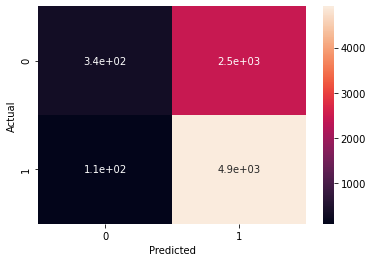

In [20]:
# 혼합행렬
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [21]:
# 모형 성능 평가 - 평가지표 계산
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.12      0.21      2806
           1       0.67      0.98      0.79      5021

    accuracy                           0.67      7827
   macro avg       0.71      0.55      0.50      7827
weighted avg       0.70      0.67      0.58      7827



### KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
model_knn = GridSearchCV(knn, {'n_neighbors': [5, 10, 30, 100]}, n_jobs=4, cv=3, scoring='accuracy')

In [23]:
model_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': [5, 10, 30, 100]}, scoring='accuracy')

In [24]:
model_knn.best_params_

{'n_neighbors': 100}

In [25]:
knn_best = model_knn.best_estimator_

In [26]:
y_pred = knn_best.predict(X_test)

[[ 153 2653]
 [  87 4934]]


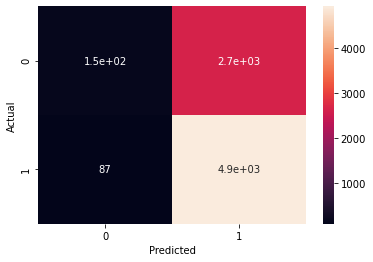

In [27]:
# 혼합행렬
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.05      0.10      2806
           1       0.65      0.98      0.78      5021

    accuracy                           0.65      7827
   macro avg       0.64      0.52      0.44      7827
weighted avg       0.65      0.65      0.54      7827



### SVM

In [29]:
from sklearn import svm

svm_model = svm.SVC(kernel='rbf', random_state=42)

In [30]:
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, 
                           {'C': [1, 5, 9, 15], 'gamma':[0.01, 0.05, 0.1]}, 
                           n_jobs=-1, cv=7, scoring='accuracy')

In [31]:
start = time.time()
model_svm.fit(X_train, y_train)
print(f'{np.round(time.time()-start, 3)}초') # 걸린시간

249.954초


In [32]:
model_svm.best_params_

{'C': 5, 'gamma': 0.1}

In [33]:
svm_best = model_svm.best_estimator_

In [34]:
y_pred = svm_best.predict(X_test)

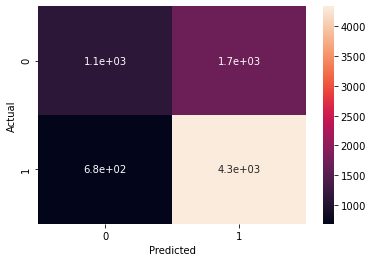

In [35]:
confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.40      0.48      2806
           1       0.72      0.86      0.79      5021

    accuracy                           0.70      7827
   macro avg       0.67      0.63      0.63      7827
weighted avg       0.68      0.70      0.68      7827



### 결정트리

In [37]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()

dt = DecisionTreeClassifier(random_state=42, max_depth=10)
dt.fit(X_train, y_train)
print(dt.feature_importances_)

print(f'{np.round(time.time()-start, 3)}초') # 걸린시간

[0.00683053 0.00215928 0.00457548 0.         0.02349897 0.00128905
 0.00471708 0.         0.01252781 0.03002985 0.04668053 0.
 0.69489378 0.04694644 0.00380529 0.00214841 0.01316644 0.01229888
 0.00280124 0.03557082 0.02540824 0.03065186]
0.091초


In [38]:
# 예측
y_pred = dt.predict(X_test)

[[ 651 2155]
 [ 159 4862]]


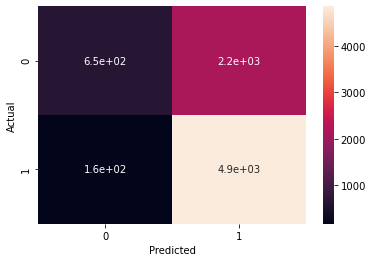

In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.23      0.36      2806
           1       0.69      0.97      0.81      5021

    accuracy                           0.70      7827
   macro avg       0.75      0.60      0.58      7827
weighted avg       0.73      0.70      0.65      7827



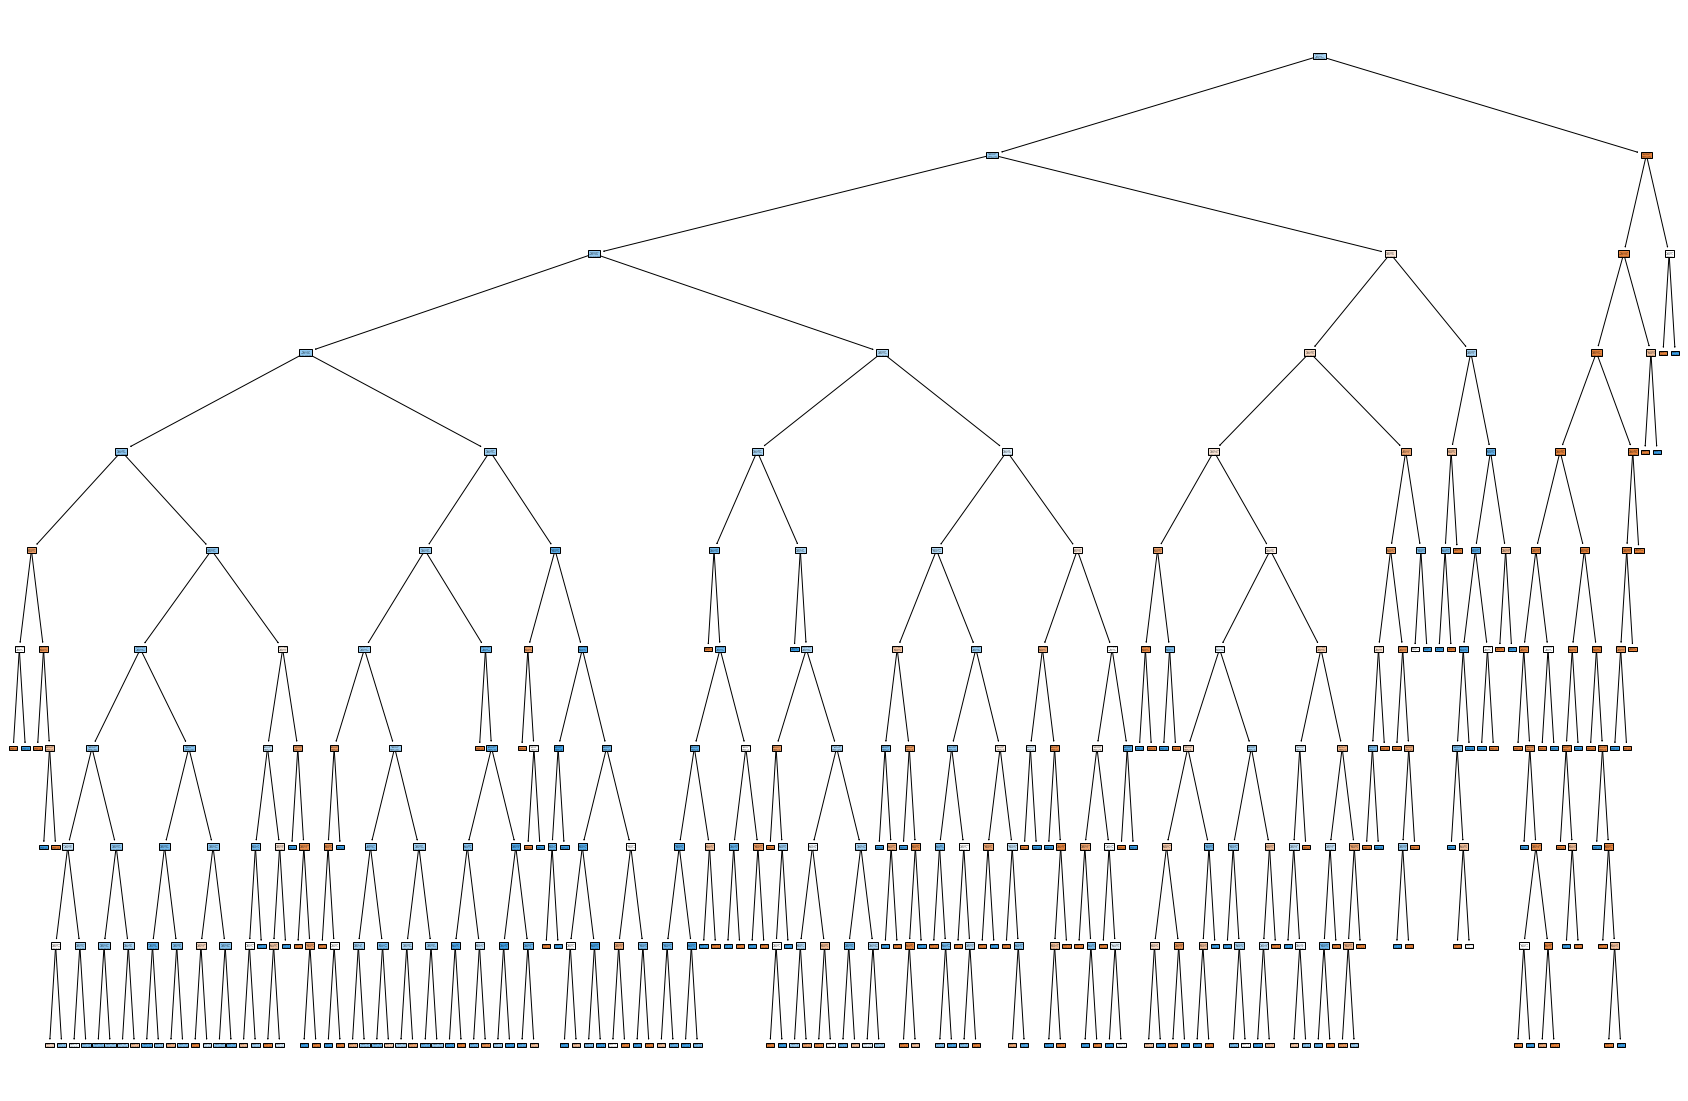

8.861초


In [41]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

start = time.time()

plt.figure(figsize=(30,20))
plot_tree(dt, filled=True)

plt.show()

print(f'{np.round(time.time()-start, 3)}초') # 걸린시간

In [42]:
#print(dt.feature_importances_)
dt.set_params

<bound method BaseEstimator.set_params of DecisionTreeClassifier(max_depth=10, random_state=42)>

In [43]:
# feature 별 feature importance 매핑
feature_names = X.columns.tolist()
feature_value = dt.feature_importances_
dict_feature = {n:v for n, v in zip(feature_names, feature_value)}
dict_feature = sorted(dict_feature.items(), reverse=True, key=lambda x: x[1])

In [44]:
tmp_value = []
tmp_name = []
for i in dict_feature:
    tmp_name.append(i[0])
    tmp_value.append(i[1])
# print(tmp_name, tmp_value)

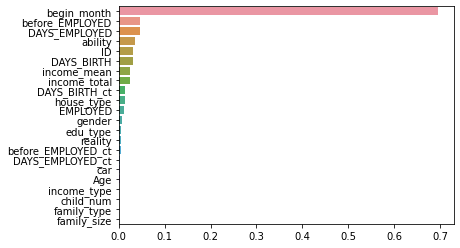

In [46]:
# feature importance 시각화
sns.barplot(x=tmp_value, y=tmp_name)
# plt.savefig('dt_feature_importance.png', dpi = 150)
plt.show()

### 랜덤 포레스트

In [47]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
start = time.time() # 시작 시간

# 랜덤 포레스트의 parameter 범위 정의
RF_params = {
    'n_estimators' : [1000],
    'max_features' : ['auto'],
    'max_depth' : [15],
    'min_samples_leaf' : [5],
    'min_samples_split' : [2, 4]   # min_samples_split 1보다 크거나 또는 (0, 1.0]
}

# GridSearchCV를 이용
model_RF = GridSearchCV(RandomForestClassifier(random_state=42,), param_grid=RF_params, n_jobs=8)
model_RF.fit(X_train, y_train)
print(model_RF.best_params_)

RF_best = model_RF.best_estimator_

y_pred = RF_best.predict(X_test)

print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)

{'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 1000}
걸린시간 : 47.103초


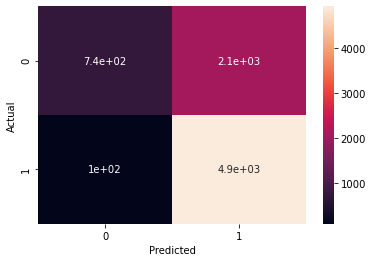

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.27      0.41      2806
           1       0.70      0.98      0.82      5021

    accuracy                           0.72      7827
   macro avg       0.79      0.62      0.61      7827
weighted avg       0.77      0.72      0.67      7827



### XGBoost

In [50]:
from xgboost import XGBClassifier

In [51]:
start = time.time()

XGB_params = {
    'min_child_weight': [3, 5],
    'gamma': [1],
    'subsample': [1],
    'colsample_bytree': [0.6],
    'max_depth': [10]}

model_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid=XGB_params, n_jobs=8)

model_xgb.fit(X_train, y_train)

print(model_xgb.best_params_)

xgb_best = model_xgb.best_estimator_
y_pred = xgb_best.predict(X_test)

print(f'{np.round(time.time()-start, 3)}초') # 걸린시간

[11:01:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 10, 'min_child_weight': 5, 'subsample': 1}
2.695초


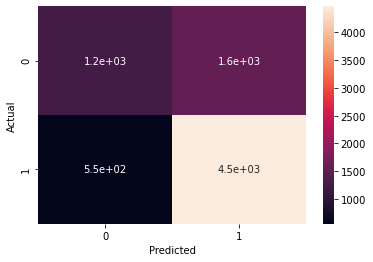

In [54]:
confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.45      0.54      2806
           1       0.74      0.89      0.81      5021

    accuracy                           0.73      7827
   macro avg       0.72      0.67      0.68      7827
weighted avg       0.72      0.73      0.71      7827



## 변수축소 - 모델학습 및 평가

In [56]:
# 변수축소
X_train = X_train[['begin_month', 'DAYS_EMPLOYED', 'ID', 'ability', 'DAYS_BIRTH', 'before_EMPLOYED', 'income_mean']]
X_test = X_test[['begin_month', 'DAYS_EMPLOYED', 'ID', 'ability', 'DAYS_BIRTH', 'before_EMPLOYED', 'income_mean']]

### 로지스틱 회귀

In [57]:
from sklearn.linear_model import LogisticRegression
model_logit = LogisticRegression()
model_logit.fit(X_train, y_train)

LogisticRegression()

In [58]:
model_logit.score(X_train, y_train), model_logit.score(X_test, y_test) 

(0.6667214281802749, 0.6681998211319791)

In [59]:
# 예측
y_pred = model_logit.predict(X_test)

[[ 240 2566]
 [  31 4990]]


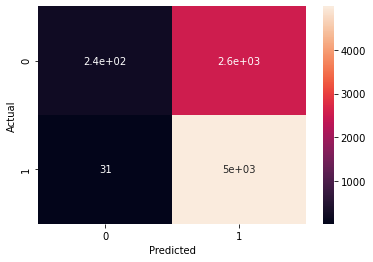

In [60]:
# 혼합행렬
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [61]:
# 모형 성능 평가 - 평가지표 계산
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.09      0.16      2806
           1       0.66      0.99      0.79      5021

    accuracy                           0.67      7827
   macro avg       0.77      0.54      0.47      7827
weighted avg       0.74      0.67      0.56      7827



### KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
model_knn = GridSearchCV(knn, {'n_neighbors': [10,30]}, n_jobs=-1, cv=7, scoring='accuracy')

In [63]:
model_knn.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [10, 30]}, scoring='accuracy')

In [64]:
model_knn.best_params_

{'n_neighbors': 30}

In [65]:
knn_best = model_knn.best_estimator_

In [66]:
y_pred = knn_best.predict(X_test)

[[ 709 2097]
 [ 423 4598]]


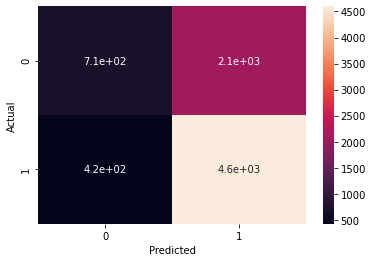

In [67]:
# 혼합행렬
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.25      0.36      2806
           1       0.69      0.92      0.78      5021

    accuracy                           0.68      7827
   macro avg       0.66      0.58      0.57      7827
weighted avg       0.67      0.68      0.63      7827



### SVM

In [69]:
from sklearn import svm

svm_model = svm.SVC(kernel='rbf')

In [70]:
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, 
                           {'C': [1, 9, 15], 'gamma':[0.05]}, 
                           n_jobs=-1, cv=7, scoring='accuracy')

In [71]:
model_svm.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 9, 15], 'gamma': [0.05]}, scoring='accuracy')

In [72]:
model_svm.best_params_

{'C': 15, 'gamma': 0.05}

In [73]:
svm_best = model_svm.best_estimator_

In [74]:
y_pred = svm_best.predict(X_test)

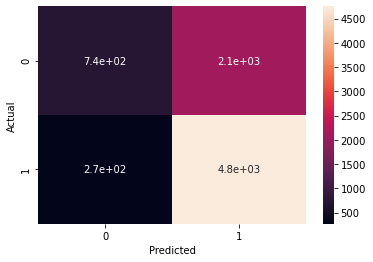

In [75]:
confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.26      0.39      2806
           1       0.70      0.95      0.80      5021

    accuracy                           0.70      7827
   macro avg       0.71      0.60      0.60      7827
weighted avg       0.71      0.70      0.65      7827



### 결정트리

In [77]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier


In [78]:
# 가지치기
dt = DecisionTreeClassifier(max_depth=10, random_state=42) 
dt.fit(X_train, y_train)
print(dt.feature_importances_)

[0.74639466 0.04367946 0.04379908 0.0542415  0.03000909 0.05267324
 0.02920296]


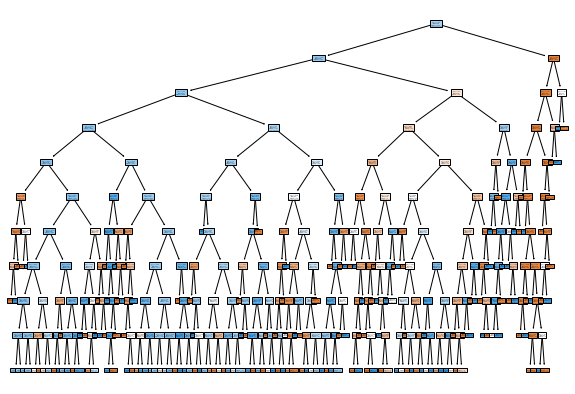

In [79]:
plt.figure(figsize=(10,7))
plot_tree(dt, filled=True)
plt.show()

In [80]:
print(dt.feature_importances_)

[0.74639466 0.04367946 0.04379908 0.0542415  0.03000909 0.05267324
 0.02920296]


In [81]:
# feature 별 feature importance 매핑
feature_names = X_train.columns.tolist()
feature_value = dt.feature_importances_
dict_feature = {n:v for n, v in zip(feature_names, feature_value)}
dict_feature = sorted(dict_feature.items(), reverse=True, key=lambda x: x[1])


tmp_value = []
tmp_name = []
for i in dict_feature:
    tmp_name.append(i[0])
    tmp_value.append(i[1])
# print(tmp_name, tmp_value)

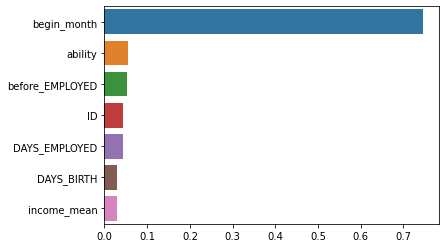

In [82]:
# feature importance 시각화
sns.barplot(x=tmp_value, y=tmp_name)
plt.show()

In [83]:
y_pred = dt.predict(X_test)

[[ 614 2192]
 [ 117 4904]]


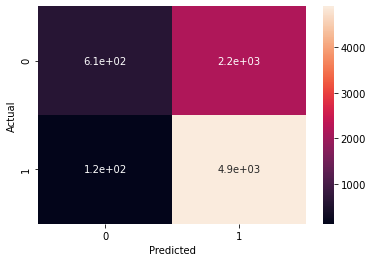

In [84]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.22      0.35      2806
           1       0.69      0.98      0.81      5021

    accuracy                           0.70      7827
   macro avg       0.77      0.60      0.58      7827
weighted avg       0.74      0.70      0.64      7827



### 랜덤 포레스트

In [86]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
start = time.time() # 시작 시간

# 랜덤 포레스트의 parameter 범위 정의
RF_params = {
    'n_estimators' : [1000],
    'max_features' : ['auto'],
    'max_depth' : [15],
    'min_samples_leaf' : [5],
    'min_samples_split' : [2, 4]   # min_samples_split 1보다 크거나 또는 (0, 1.0]
}

# GridSearchCV를 이용
model_RF = GridSearchCV(RandomForestClassifier(random_state=42,), param_grid=RF_params, n_jobs=8)
model_RF.fit(X_train, y_train)
print(model_RF.best_params_)

RF_best = model_RF.best_estimator_

y_pred = RF_best.predict(X_test)

print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)

{'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 1000}
걸린시간 : 48.646초


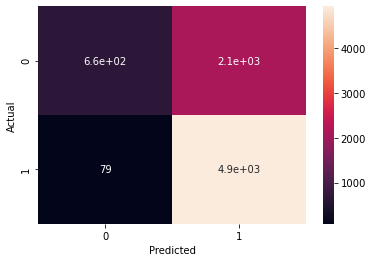

In [87]:
confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.24      0.37      2806
           1       0.70      0.98      0.82      5021

    accuracy                           0.72      7827
   macro avg       0.80      0.61      0.59      7827
weighted avg       0.77      0.72      0.66      7827



### XGBoost

In [89]:
from xgboost import XGBClassifier
start = time.time()

XGB_params = {
    'min_child_weight': [3, 5],
    'gamma': [1],
    'subsample': [1],
    'colsample_bytree': [0.6],
    'max_depth': [10]}

model_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid=XGB_params, n_jobs=8)

model_xgb.fit(X_train, y_train)

print(model_xgb.best_params_)

xgb_best = model_xgb.best_estimator_
y_pred = xgb_best.predict(X_test)

print(f'{np.round(time.time()-start, 3)}초') # 걸린시간

[11:03:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 1}
2.248초


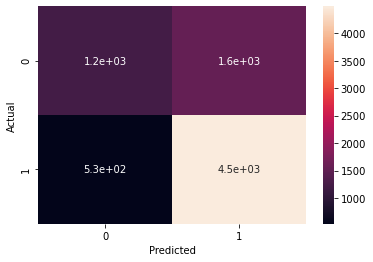

In [90]:
confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.44      0.54      2806
           1       0.74      0.89      0.81      5021

    accuracy                           0.73      7827
   macro avg       0.72      0.67      0.68      7827
weighted avg       0.73      0.73      0.71      7827

